In [33]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [34]:
heart_df = pd.read_csv("heart.csv")

In [35]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
heart_df.shape

(303, 14)

In [38]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [39]:
# capture the target column ("default") into separate vectors for training set and test set

X = heart_df.drop("target" , axis=1)

y = heart_df.pop("target")

In [45]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=0)

In [46]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [47]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [48]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Heart_Tree_File = open('d:\heart_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Heart_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Heart_Tree_File.close()

In [49]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

               Imp
cp        0.253408
age       0.161962
ca        0.161942
thalach   0.093367
thal      0.074027
oldpeak   0.067144
chol      0.049712
sex       0.047530
trestbps  0.037861
fbs       0.037446
restecg   0.015602
exang     0.000000
slope     0.000000


In [50]:
y_predict = dt_model.predict(X_test)

In [16]:
# Regularising the Decision Tree

In [51]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=30)

In [52]:
heart_tree_regularized = open('d:\heart_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= heart_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

heart_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

               Imp
cp        0.253408
age       0.161962
ca        0.161942
thalach   0.093367
thal      0.074027
oldpeak   0.067144
chol      0.049712
sex       0.047530
trestbps  0.037861
fbs       0.037446
restecg   0.015602
exang     0.000000
slope     0.000000


In [53]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [54]:
ytrain_predict

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [56]:
ytrain_predict1 = reg_dt_model.predict_proba(X_train)
ytest_predict1 = reg_dt_model.predict_proba(X_test)

In [23]:
ytrain_predict1

array([[0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.01960784, 0.98039216],
       [0.72727273, 0.27272727],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.01960784, 0.98039216],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       [0.72727273, 0.27272727],
       [0.20689655, 0.79310345],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.20689655, 0.79310345],
       [0.20689655, 0.79310345],
       [0.01960784, 0.98039216],
       [0.07142857, 0.92857143],
       [0.7       , 0.3       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.01960784, 0.98039216],
       [0.07142857, 0.92857143],
       [0.5       , 0.5       ],
       [0.01960784, 0.98039216],
       [0.

AUC: 0.912


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

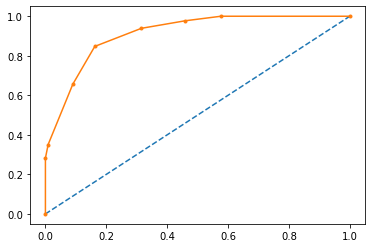

In [57]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.856


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

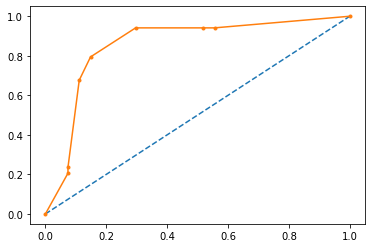

In [58]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       111
           1       0.86      0.85      0.85       131

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



In [61]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [62]:
confusion_matrix(train_labels, ytrain_predict)

array([[ 93,  18],
       [ 20, 111]], dtype=int64)

In [63]:
confusion_matrix(test_labels, ytest_predict)

array([[23,  4],
       [ 7, 27]], dtype=int64)

In [64]:
reg_dt_model.score(X_train,train_labels)

0.8429752066115702

In [65]:
reg_dt_model.score(X_test,test_labels)

0.819672131147541